In [1]:
import pandas as pd
import pickle, IPython,soundfile, librosa
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
rawDf = pd.read_csv('./results_re.csv')
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116761 entries, 0 to 116760
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   116761 non-null  int64  
 1   fileName     116761 non-null  object 
 2   recon_error  116761 non-null  float64
 3   t_v          116761 non-null  object 
 4   lv           116761 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
labels = pd.read_csv('sound_labeling_1s.csv')
labels.columns = ['fileName', 'isInfected']
labels.head()

,fileName,isInfected
0,FA0004_GW01_H01_0202_20211108020645_farm_mic_s...,0
1,FA0004_GW01_H01_0202_20211108020645_farm_mic_s...,0
2,FA0004_GW01_H01_0202_20211108020645_farm_mic_s...,0
3,FA0004_GW01_H01_0202_20211108020645_farm_mic_s...,0
4,FA0004_GW01_H01_0202_20211108020645_farm_mic_s...,0


In [15]:
rawDf.fileName.iloc[-1]
labels.fileName.iloc[-1]

'FA0004_GW01_H01_0203_20211109020145_farm_mic_snd_ecf0feec424e_58.jpg'

'FA0004_GW01_H01_0203_20211117081644_farm_mic_snd_50cbcc6d48e7_59.jpg'

In [16]:
rawDf = pd.merge(rawDf,labels,how="left", left_on='fileName', right_on = 'fileName')
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116761 entries, 0 to 116760
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   116761 non-null  int64  
 1   fileName     116761 non-null  object 
 2   recon_error  116761 non-null  float64
 3   t_v          116761 non-null  object 
 4   lv           116761 non-null  object 
 5   isInfected   4366 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [18]:
rawDf.isnull().sum()

rawDf.isInfected.fillna(0, inplace=True)

rawDf.isnull().sum()

Unnamed: 0          0
fileName            0
recon_error         0
t_v                 0
lv                  0
isInfected     112395
dtype: int64

Unnamed: 0     0
fileName       0
recon_error    0
t_v            0
lv             0
isInfected     0
dtype: int64

In [19]:
rawDf['createTime'] = [x.split('_')[4] for x in rawDf.fileName]
rawDf['createTime'] = pd.to_datetime(rawDf.createTime)
rawDf

,Unnamed: 0,fileName,recon_error,t_v,lv,isInfected,createTime
0,0,FA0004_GW01_H01_0202_20211108000647_farm_mic_s...,8.914686,[[-0.86585385 0.27236658 0.29670754 0.29677...,[0.59632343 0.67370445 0.33819202 0.38626477 0...,0.0,2021-11-08 00:06:47
1,1,FA0004_GW01_H01_0202_20211108000647_farm_mic_s...,5.671680,[[-0.8658688 0.27309394 0.29631272 0.29646...,[0.41813752 0.51504946 0.48299107 0.5711778 0...,0.0,2021-11-08 00:06:47
2,2,FA0004_GW01_H01_0202_20211108000647_farm_mic_s...,6.401079,[[-0.8658397 0.27170593 0.2970327 0.29710...,[0.78740823 0.5039463 0.50777376 0.40206543 0...,0.0,2021-11-08 00:06:47
3,3,FA0004_GW01_H01_0202_20211108000647_farm_mic_s...,17.046808,[[-0.86585677 0.27250513 0.2966339 0.29671...,[0.3642776 0.6234272 0.24349152 0.5693854 0...,0.0,2021-11-08 00:06:47
4,4,FA0004_GW01_H01_0202_20211108000647_farm_mic_s...,9.012706,[[-0.865856 0.27246898 0.29665792 0.29672...,[0.541605 0.54838496 0.6855085 0.3361105 0...,0.0,2021-11-08 00:06:47
...,...,...,...,...,...,...,...
116756,116756,FA0004_GW01_H01_0203_20211109020145_farm_mic_s...,6.454807,[[-0.86585385 0.2723677 0.29670712 0.29677...,[0.43657646 0.37759587 0.45021763 0.2890707 0...,0.0,2021-11-09 02:01:45
116757,116757,FA0004_GW01_H01_0203_20211109020145_farm_mic_s...,6.453803,[[-0.8658576 0.27254608 0.2966107 0.29670...,[0.47051284 0.69955975 0.69287395 0.5516944 0...,0.0,2021-11-09 02:01:45
116758,116758,FA0004_GW01_H01_0203_20211109020145_farm_mic_s...,6.825219,[[-0.8658552 0.2724316 0.29666832 0.29675...,[0.73784614 0.6234374 0.56700224 0.34350213 0...,0.0,2021-11-09 02:01:45
116759,116759,FA0004_GW01_H01_0203_20211109020145_farm_mic_s...,4.171906,[[-0.8658475 0.27206632 0.2968549 0.29692...,[0.47790226 0.49136373 0.4901642 0.48092172 0...,0.0,2021-11-09 02:01:45


<Figure size 1000x700 with 0 Axes>

abnormal : 341


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

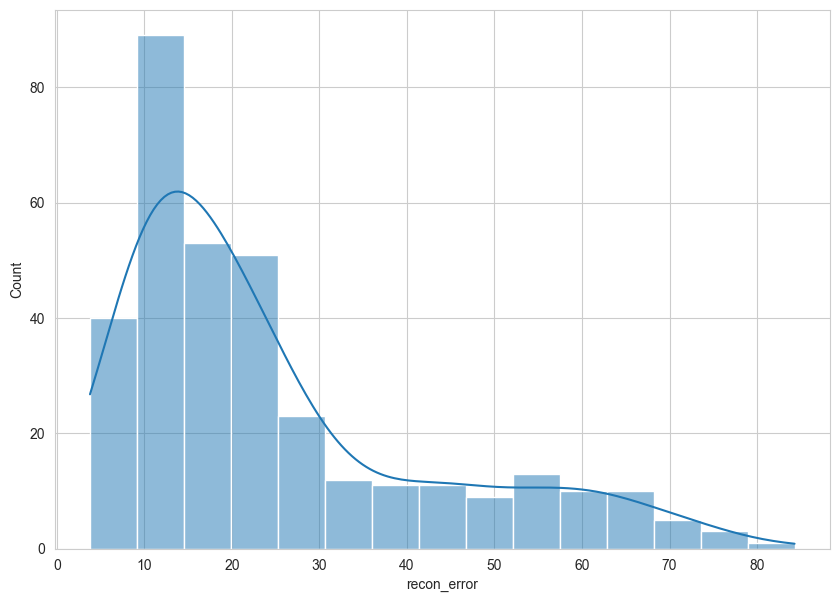

<Figure size 1000x700 with 0 Axes>

normal : 116420


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

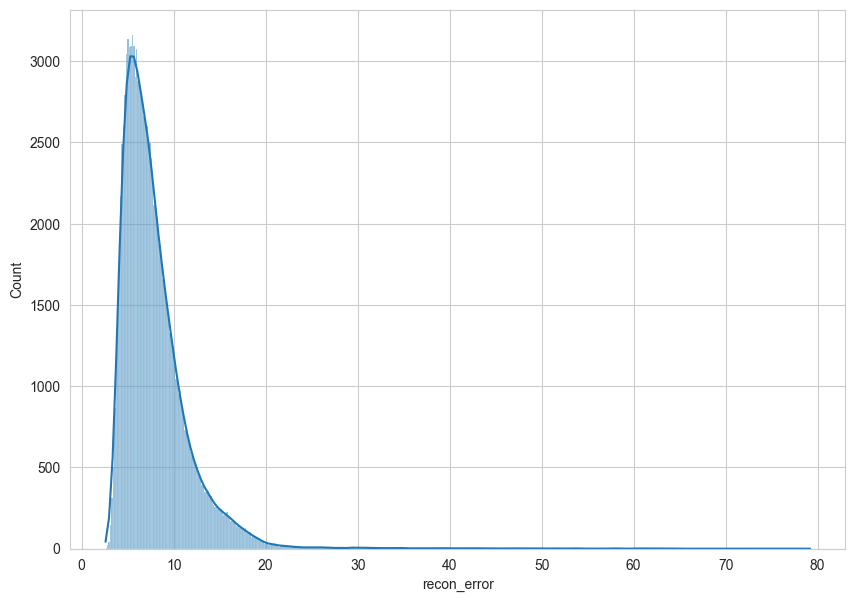

In [63]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,7))
print(f"abnormal : {len(rawDf[rawDf.isInfected == 1.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 1.0]['recon_error'], kde=True)
plt.show()

plt.figure(figsize=(10,7))
print(f"normal : {len(rawDf[rawDf.isInfected == 0.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 0.0]['recon_error'], kde=True)
plt.show()



count :             Unnamed: 0  fileName  recon_error    t_v     lv  createTime
isInfected                                                             
0.0              23009     23009        23009  23009  23009       23009
1.0                231       231          231    231    231         231


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: xlabel='createTime', ylabel='recon_error'>

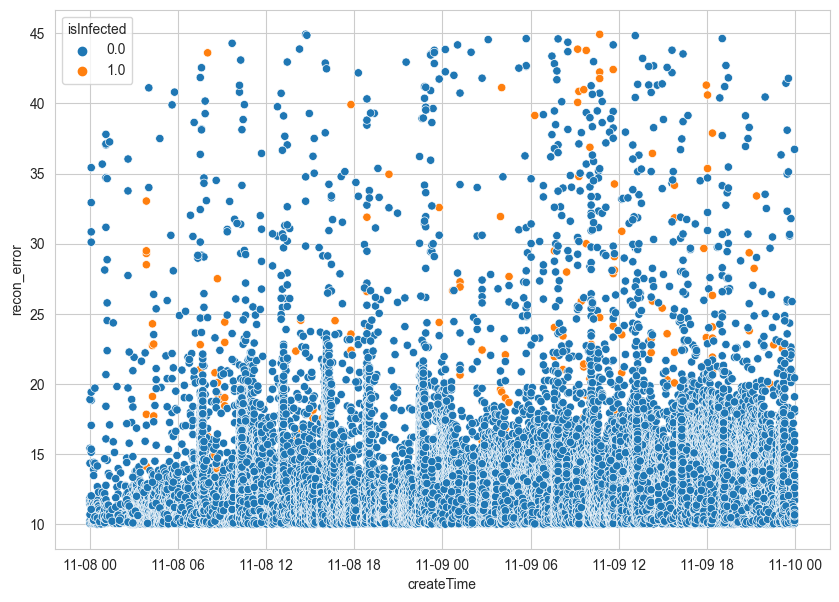

In [61]:
sns.set_style('whitegrid')

plot_df = rawDf[(rawDf.recon_error >= 10) & (rawDf.recon_error< 45)]
print(f"count : {plot_df.groupby('isInfected').agg('count')}")
plt.figure(figsize=(10,7))
sns.scatterplot(data=plot_df, x='createTime', y='recon_error', hue='isInfected')
plt.show()

In [39]:
fileListAllStrage = rawDf[(rawDf.recon_error > 20.)]['fileName'].to_list()
print(f"{len(fileListAllStrage)}/{len(rawDf)}")

1398/116761


10260

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_07.jpg : [11.27129]


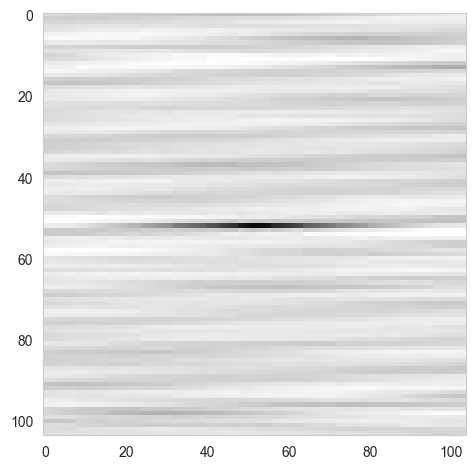

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_17.jpg : [11.412768]


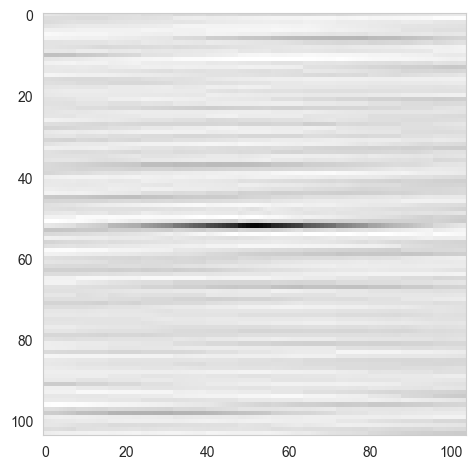

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_21.jpg : [11.0462]


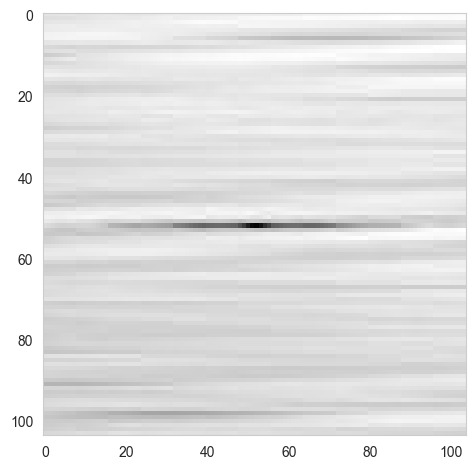

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_23.jpg : [11.637857]


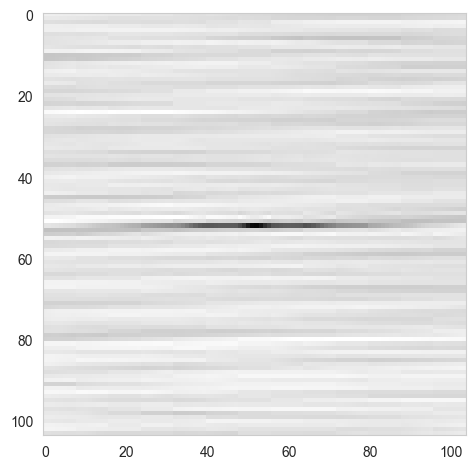

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_24.jpg : [11.025736]


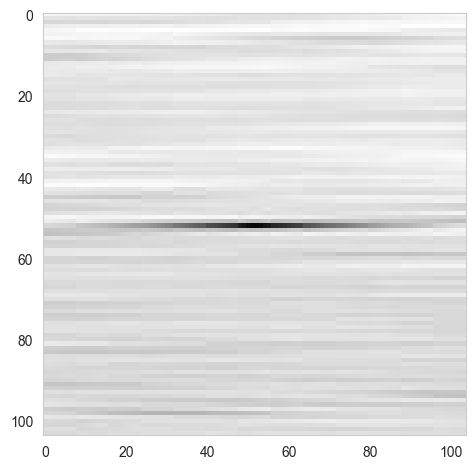

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_26.jpg : [19.415583]


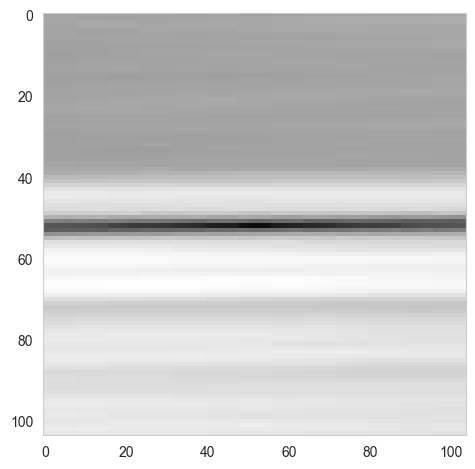

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_41.jpg : [15.133548]


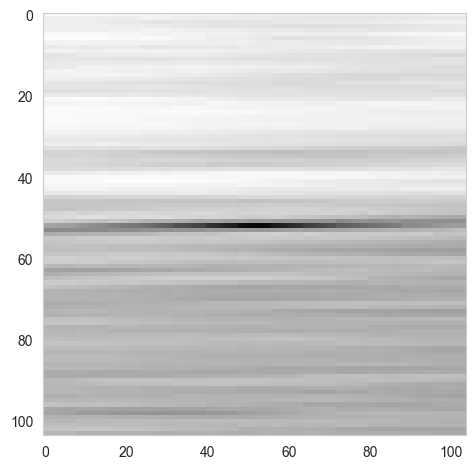

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_45.jpg : [10.093171]


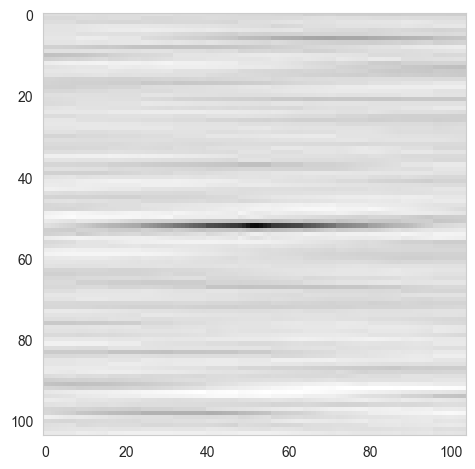

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_49.jpg : [11.46825]


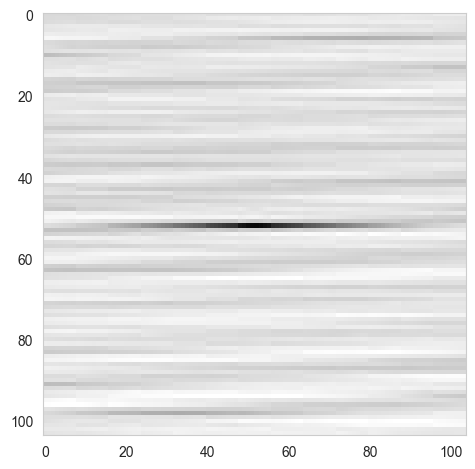

FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_52.jpg : [10.726691]


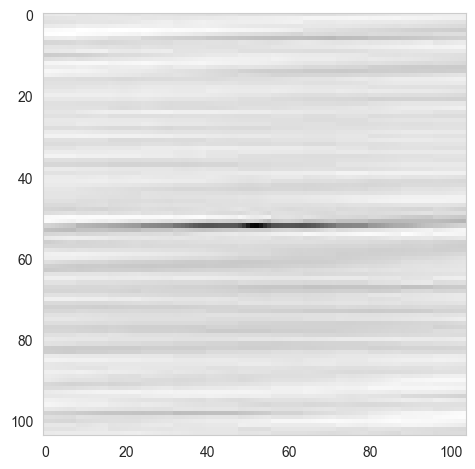

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_11.jpg : [10.338515]


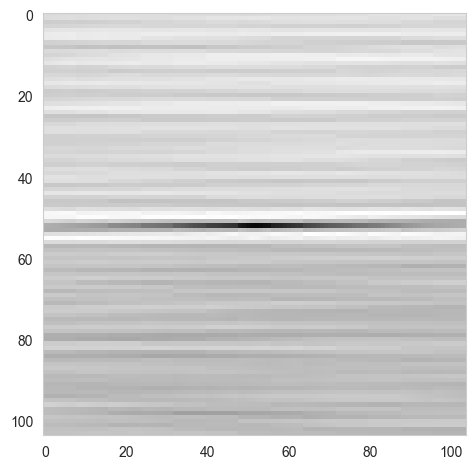

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_15.jpg : [11.25145]


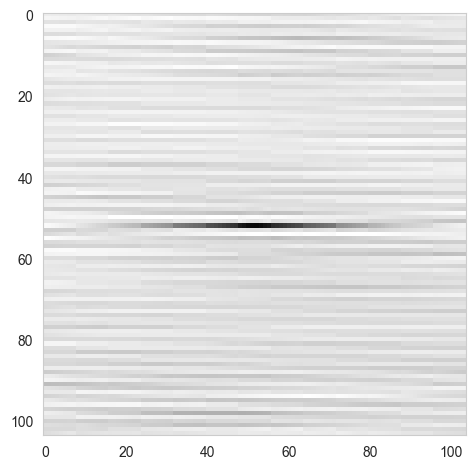

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_22.jpg : [10.081049]


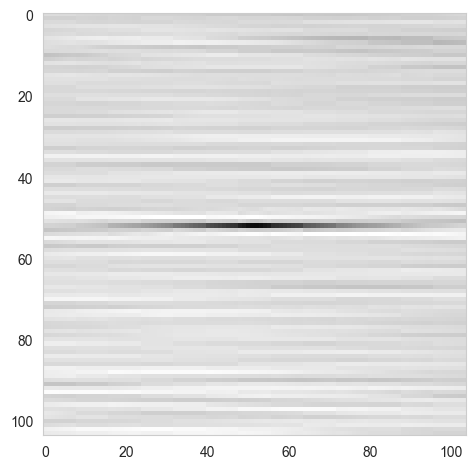

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_24.jpg : [10.490882]


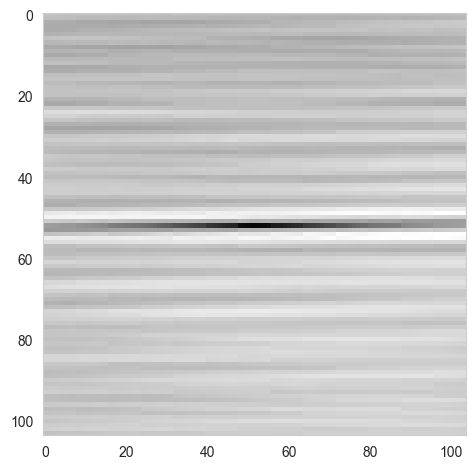

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_26.jpg : [11.936123]


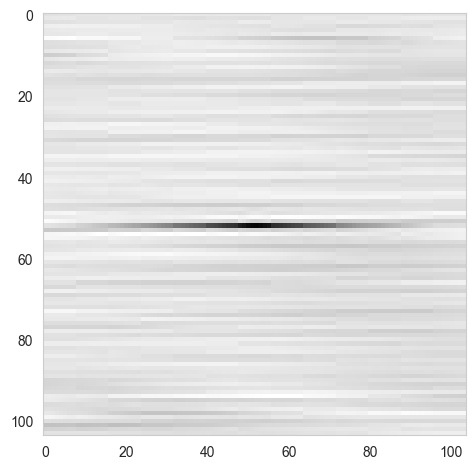

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_27.jpg : [10.288137]


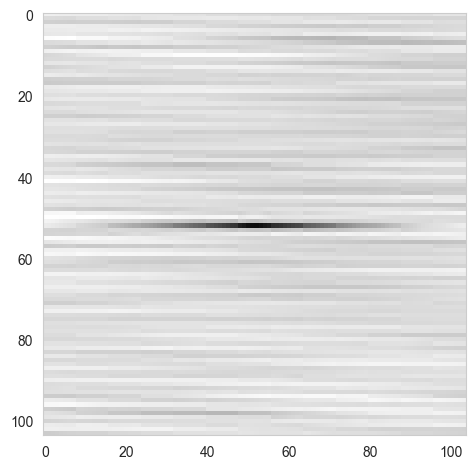

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_28.jpg : [11.794988]


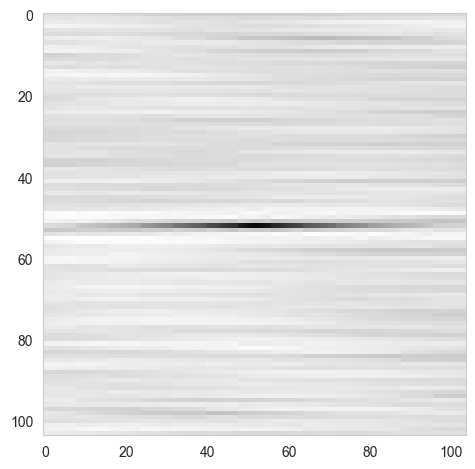

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_31.jpg : [11.76401]


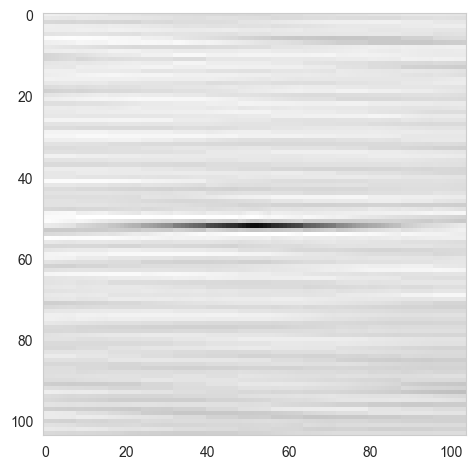

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_39.jpg : [10.637635]


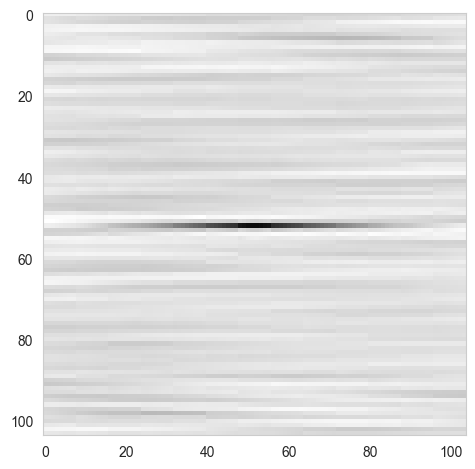

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_40.jpg : [10.178887]


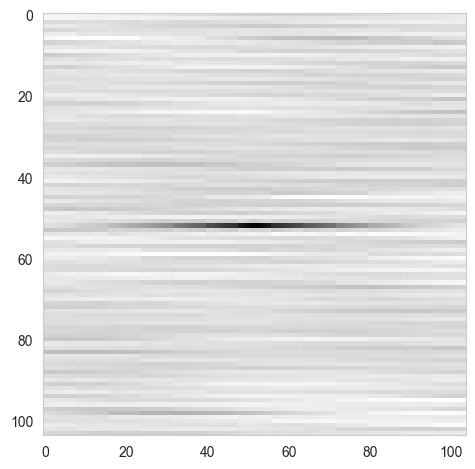

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_41.jpg : [11.658246]


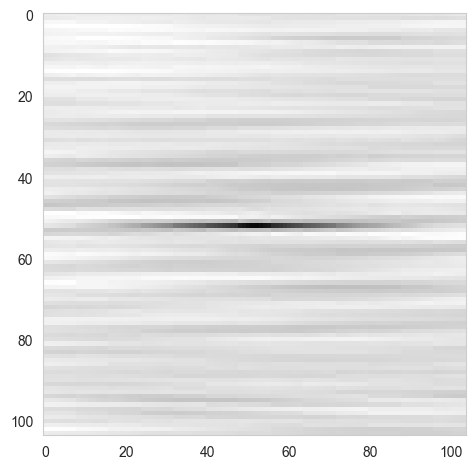

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_42.jpg : [10.54054]


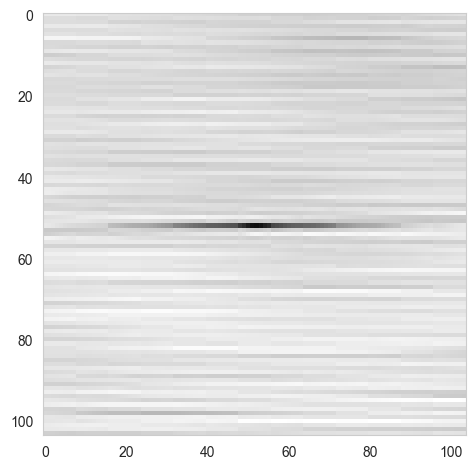

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_43.jpg : [10.451649]


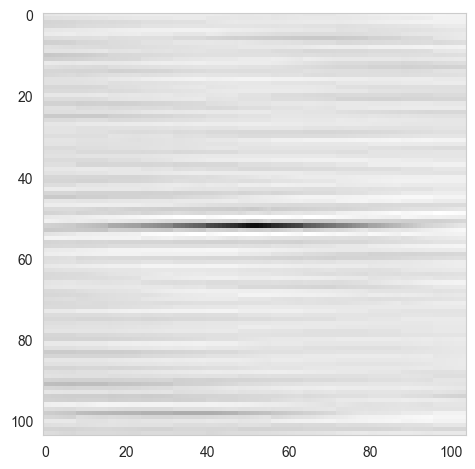

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_44.jpg : [10.9494295]


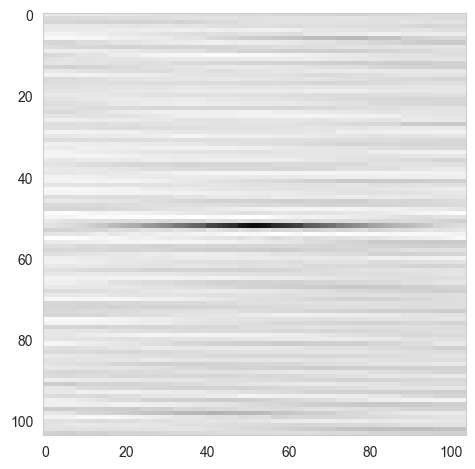

FA0004_GW01_H01_0200_20211108001146_farm_mic_snd_48708a6b475a_58.jpg : [10.38501]


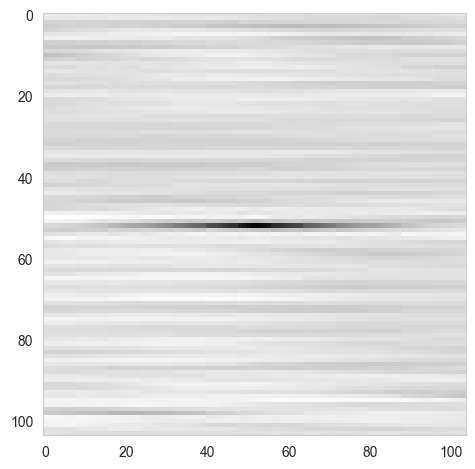

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_00.jpg : [10.173103]


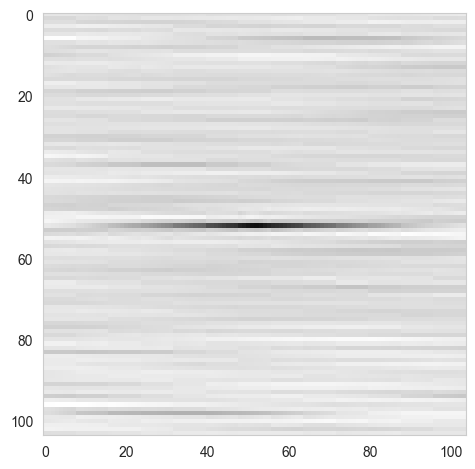

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_02.jpg : [13.903321]


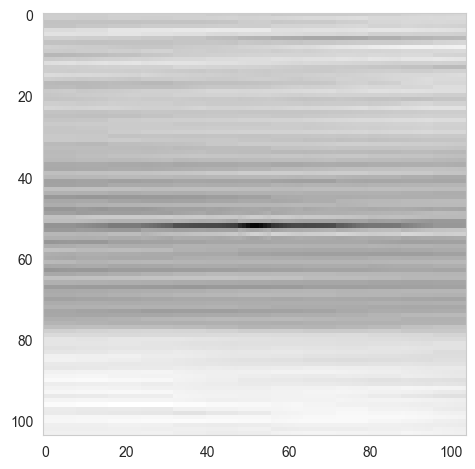

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_15.jpg : [11.355929]


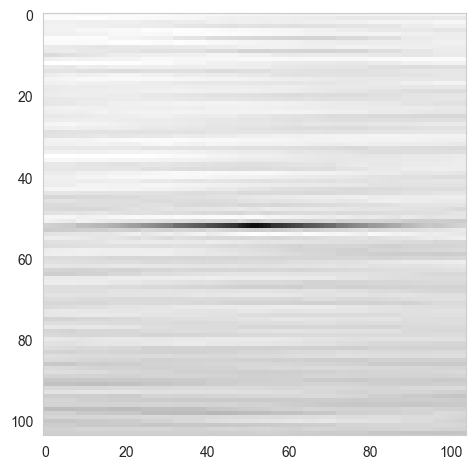

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_34.jpg : [10.600997]


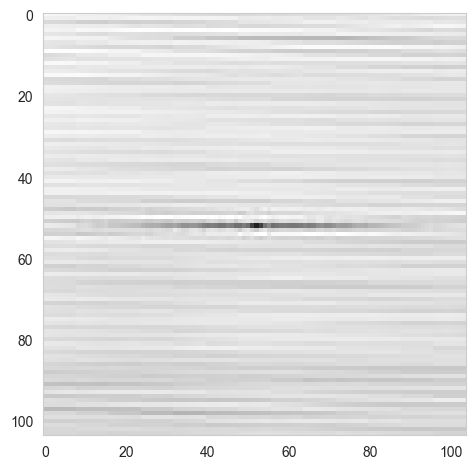

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_43.jpg : [11.07297]


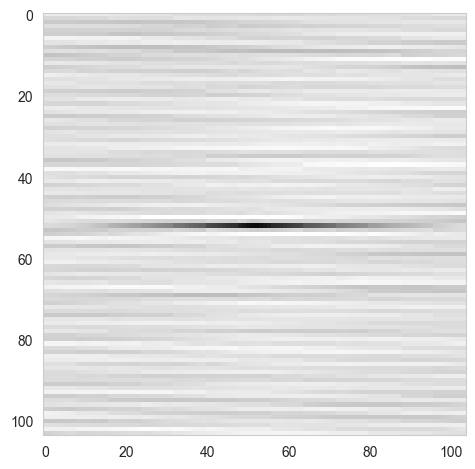

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_46.jpg : [13.47211]


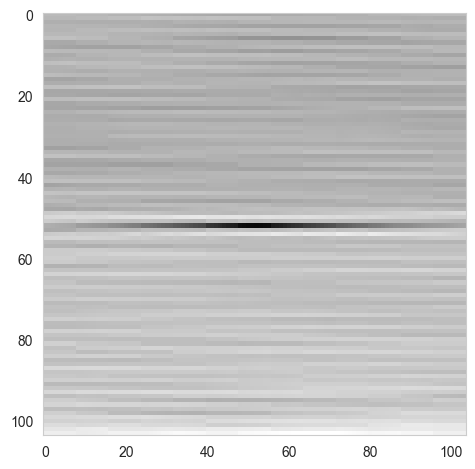

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_47.jpg : [11.459942]


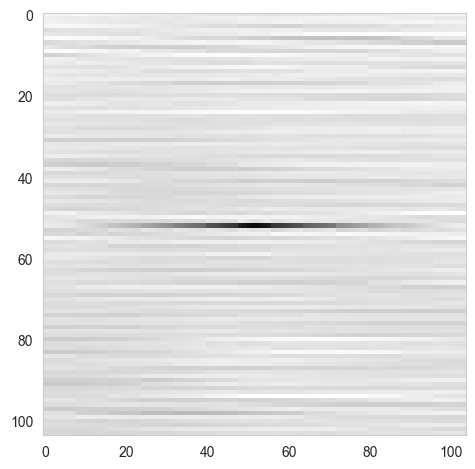

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_49.jpg : [10.22277]


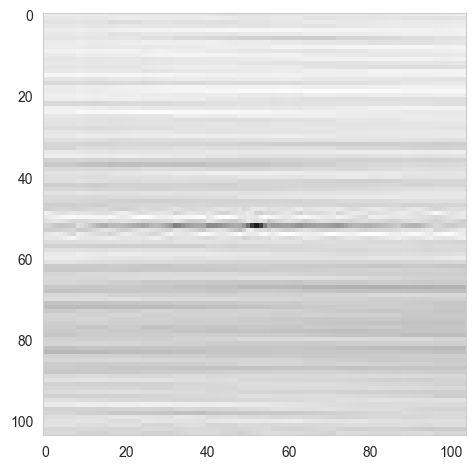

FA0004_GW01_H01_0200_20211108001646_farm_mic_snd_a181c72943b8_50.jpg : [10.552514]


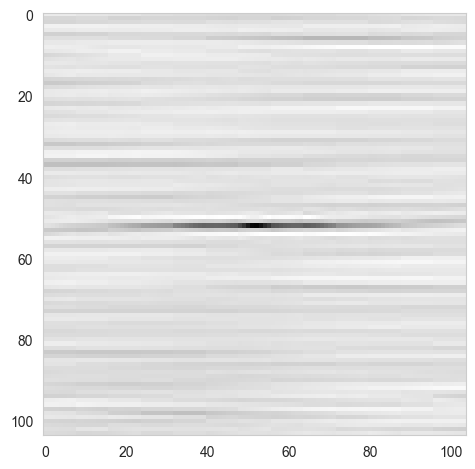

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_05.jpg : [10.63972]


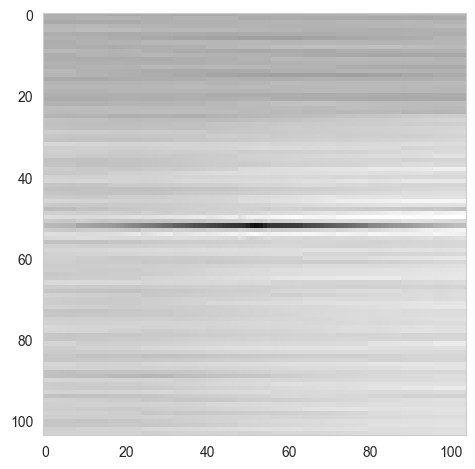

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_07.jpg : [10.038937]


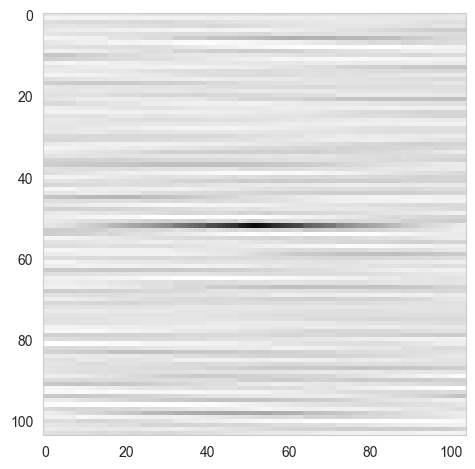

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_16.jpg : [10.396001]


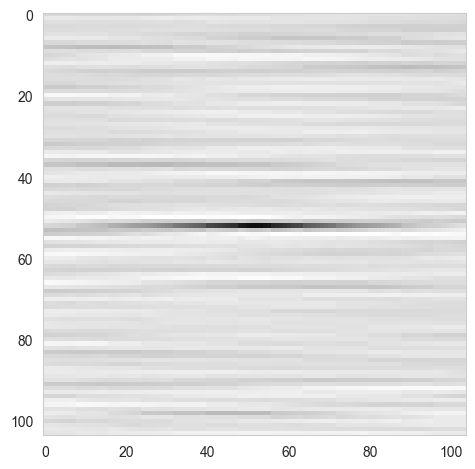

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_25.jpg : [10.3949175]


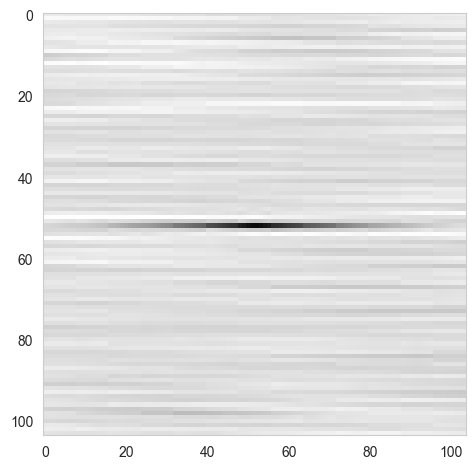

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_38.jpg : [10.193558]


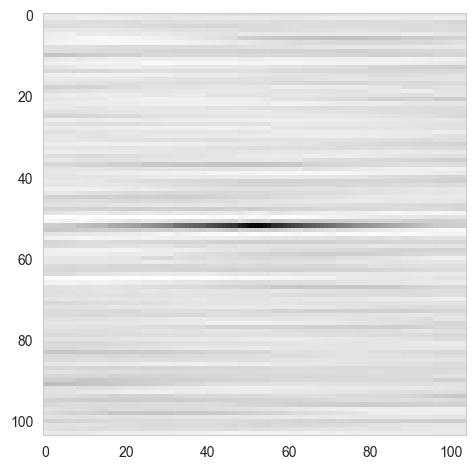

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_40.jpg : [11.606981]


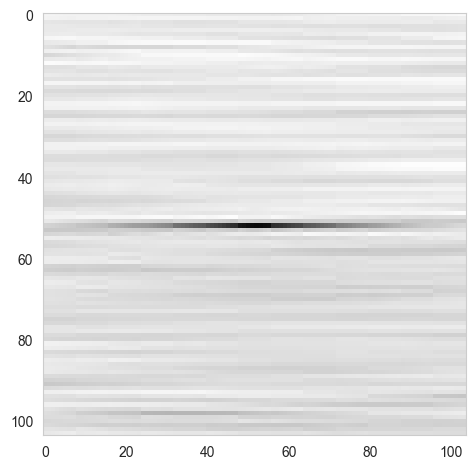

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_45.jpg : [11.833348]


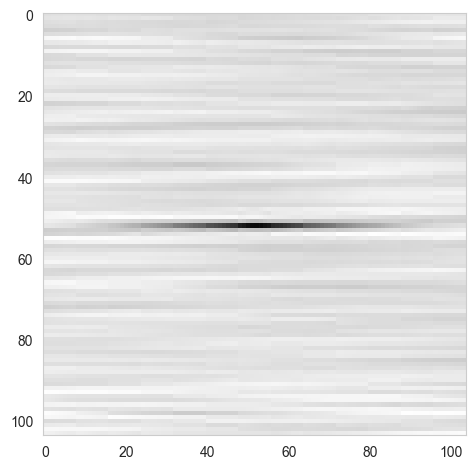

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_47.jpg : [11.225053]


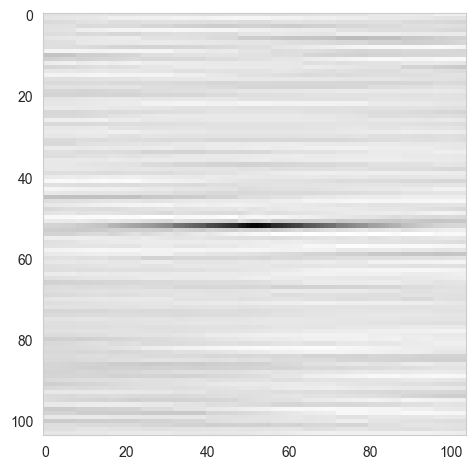

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_49.jpg : [14.159235]


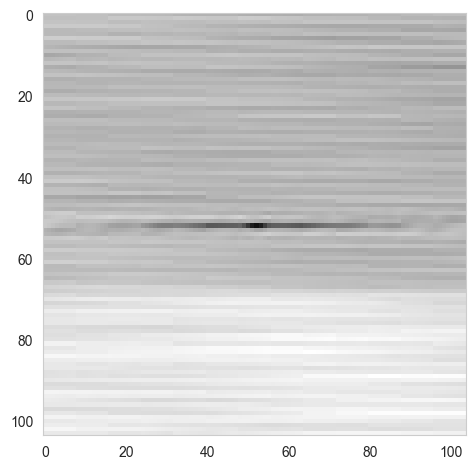

FA0004_GW01_H01_0200_20211108002146_farm_mic_snd_7844d40f4344_57.jpg : [10.200238]


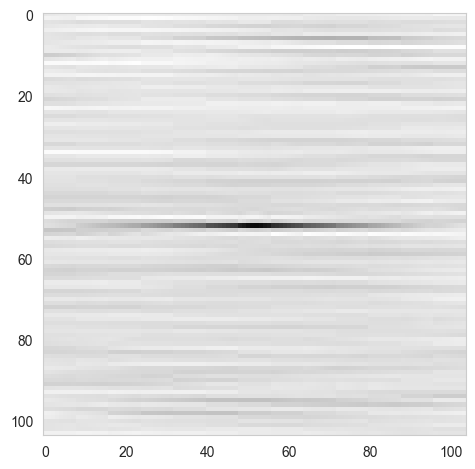

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_00.jpg : [10.485622]


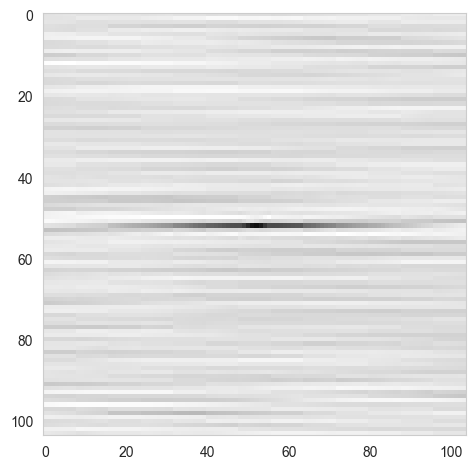

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_01.jpg : [10.479923]


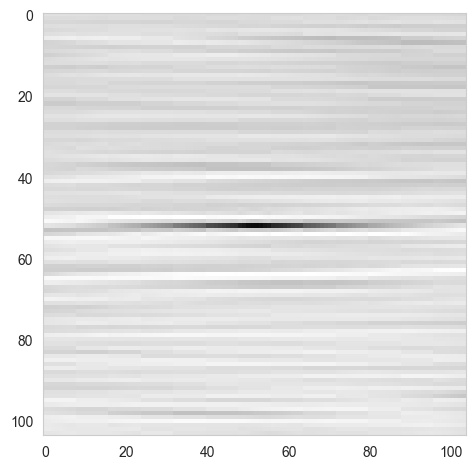

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_03.jpg : [10.183858]


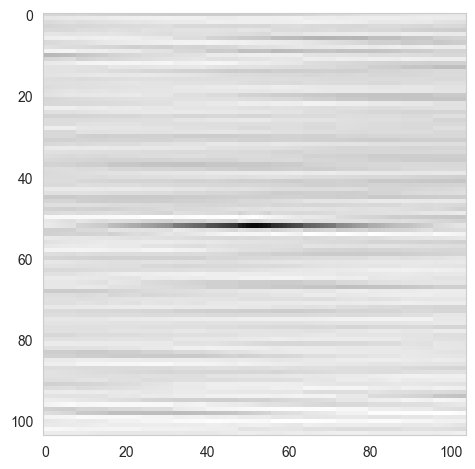

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_22.jpg : [10.204246]


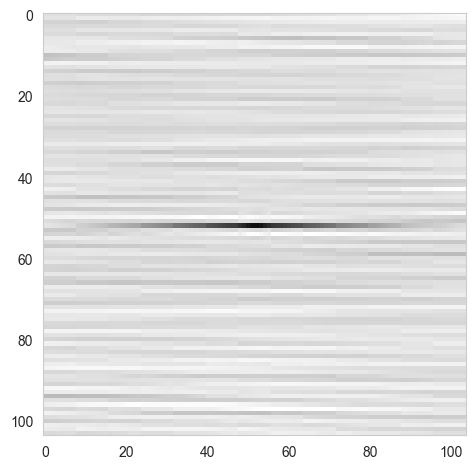

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_38.jpg : [10.05429]


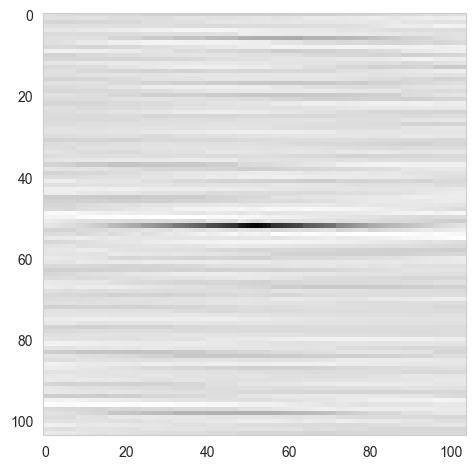

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_46.jpg : [10.439373]


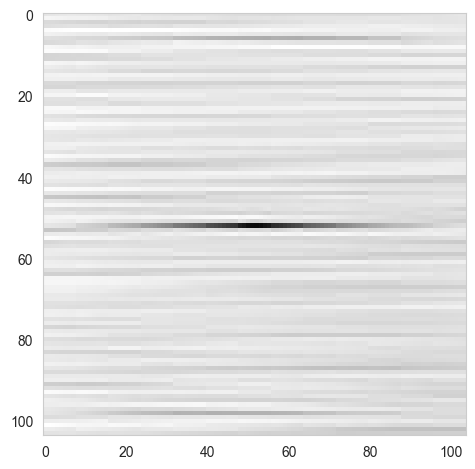

FA0004_GW01_H01_0200_20211108002644_farm_mic_snd_1adc6527448c_50.jpg : [10.245585]


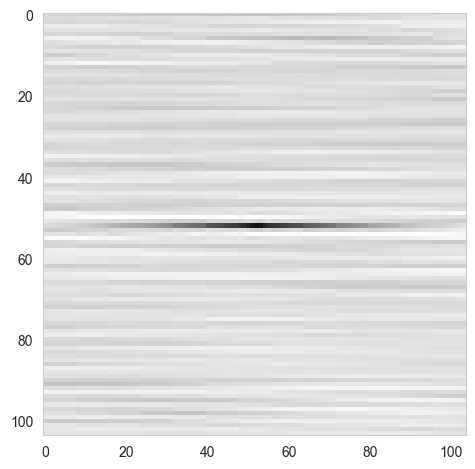

In [56]:
# abnormal
fileListnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 45.) & (rawDf.isInfected == 0.0) & (rawDf.fileName.str.contains('0200|0201'))]['fileName'].to_list()
len(fileListnormal)
for idx, aName in enumerate(fileListnormal) : 
    if idx > 50 : break
    aFileName = '../output/ilt_20211108_20211109/normal/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

55

FA0004_GW01_H01_0202_20211108020645_farm_mic_snd_dd483d8e4240_25.jpg : [5.032209]


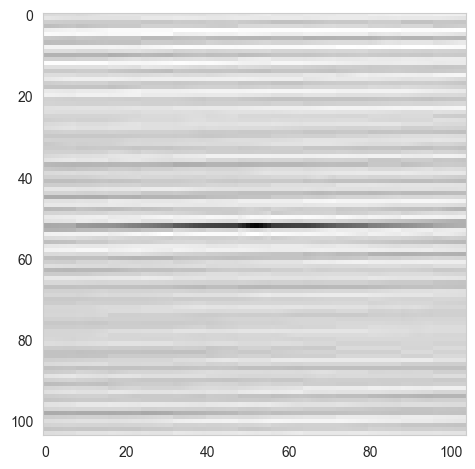

FA0004_GW01_H01_0202_20211108065144_farm_mic_snd_5473959d401d_19.jpg : [6.826992]


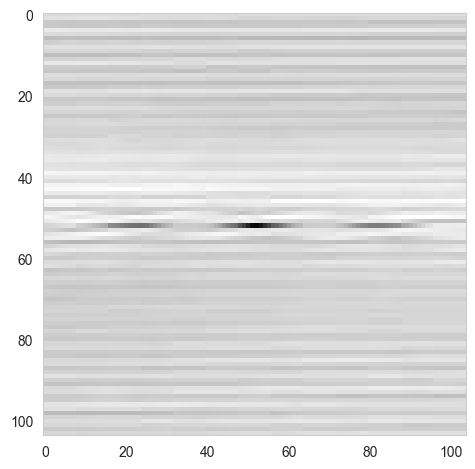

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_20.jpg : [9.212209]


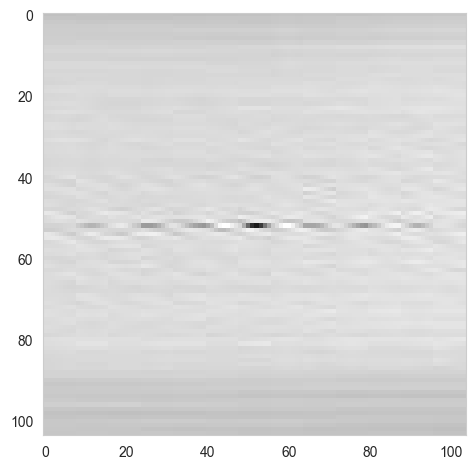

FA0004_GW01_H01_0202_20211108125145_farm_mic_snd_f3ad7c50499e_19.jpg : [9.971002]


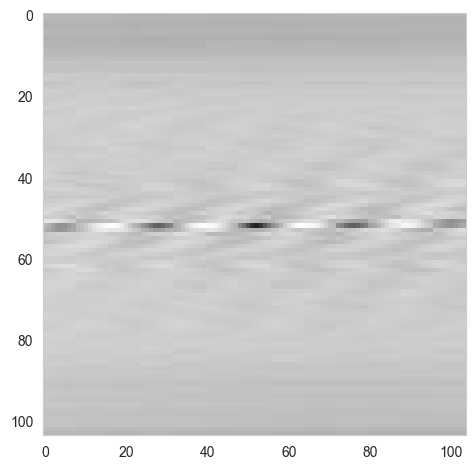

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_10.jpg : [8.014477]


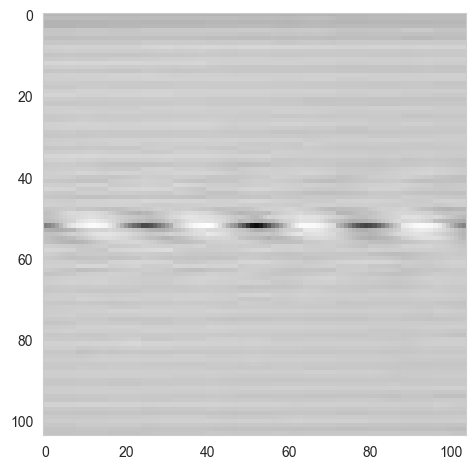

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_50.jpg : [8.976754]


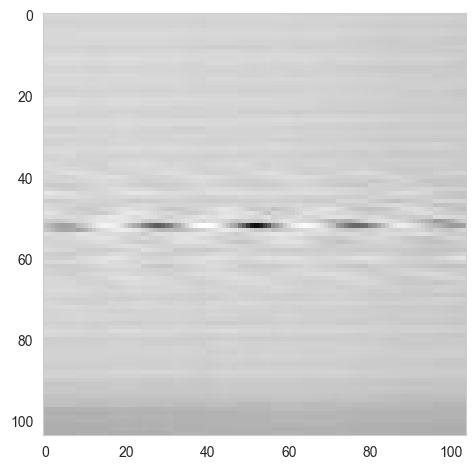

FA0004_GW01_H01_0202_20211108185145_farm_mic_snd_688d9ef84e39_23.jpg : [9.858666]


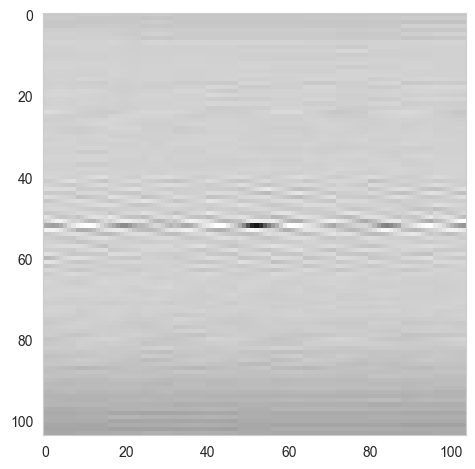

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_01.jpg : [8.118326]


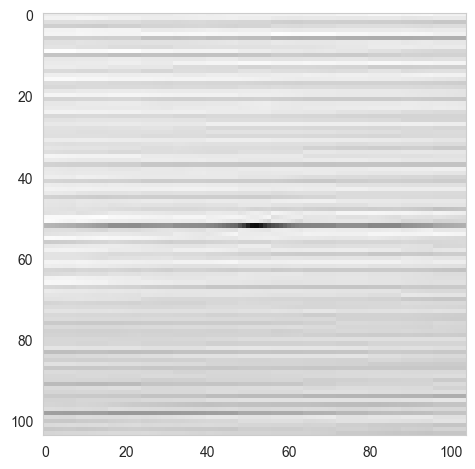

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_32.jpg : [8.406408]


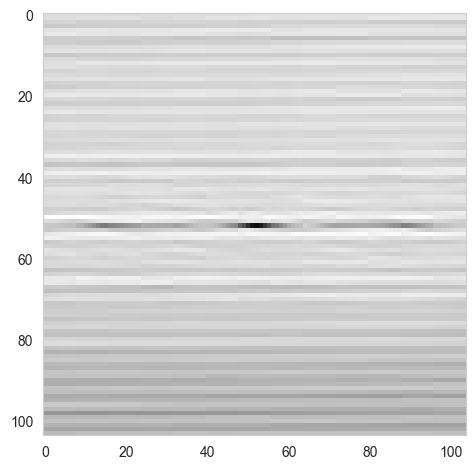

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_34.jpg : [9.619074]


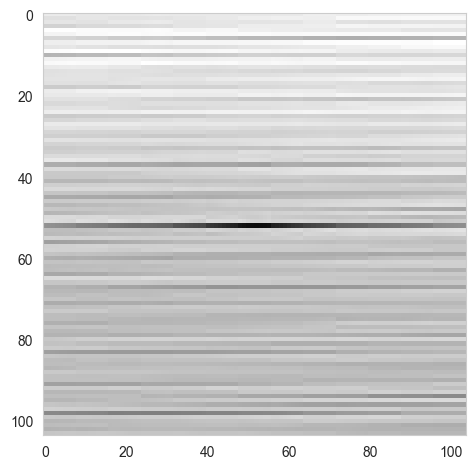

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_52.jpg : [8.365846]


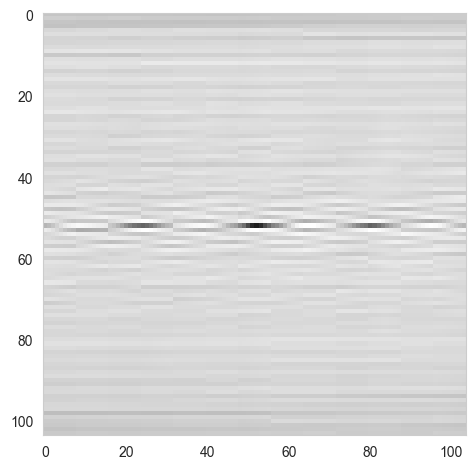

FA0004_GW01_H01_0202_20211109024145_farm_mic_snd_e82a68c4423b_53.jpg : [5.0389795]


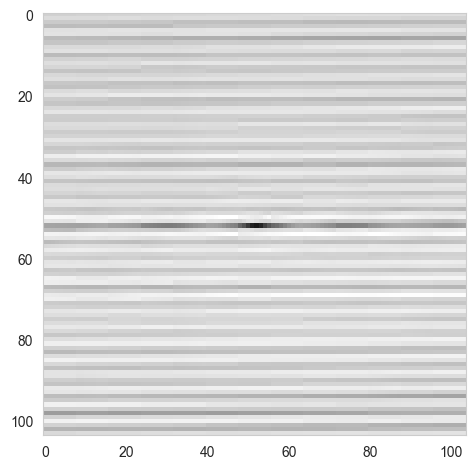

FA0004_GW01_H01_0202_20211109073649_farm_mic_snd_05c05dc14600_01.jpg : [8.293504]


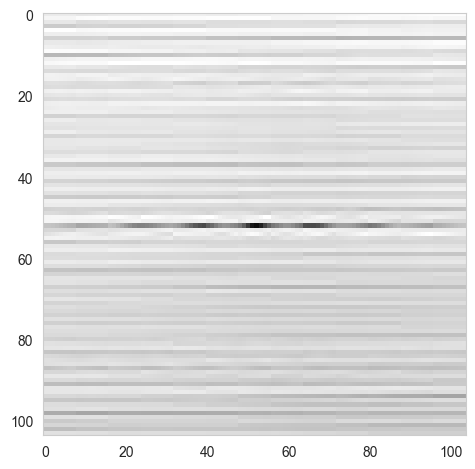

FA0004_GW01_H01_0202_20211109073649_farm_mic_snd_05c05dc14600_17.jpg : [4.366312]


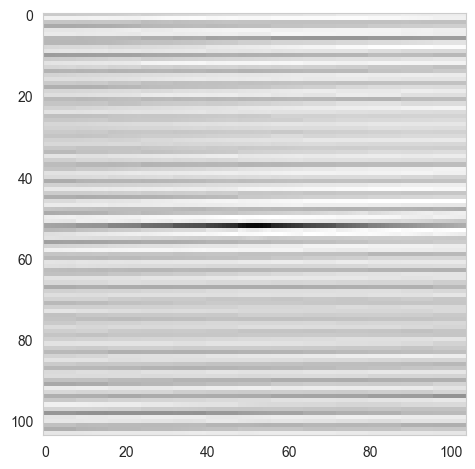

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_22.jpg : [6.9392667]


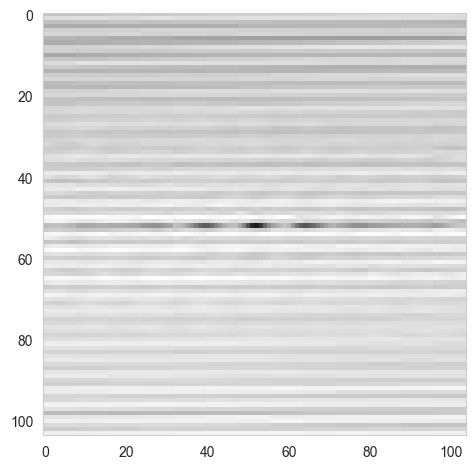

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_41.jpg : [7.052295]


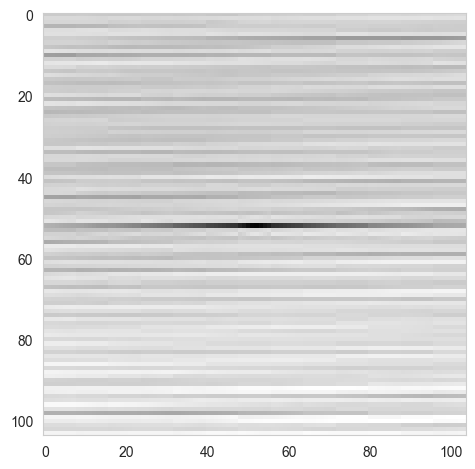

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_51.jpg : [6.4842935]


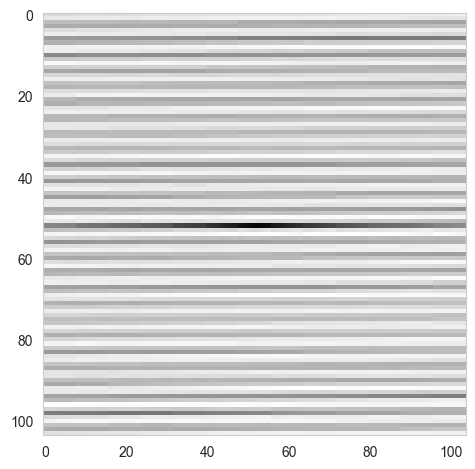

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_19.jpg : [3.7835395]


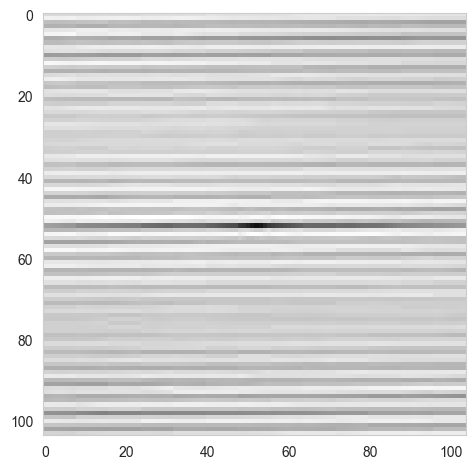

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_20.jpg : [5.2964892]


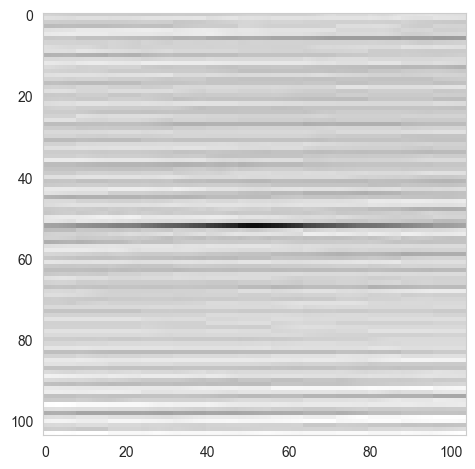

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_22.jpg : [9.678527]


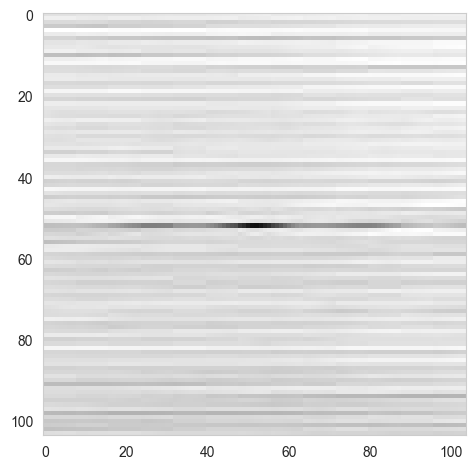

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_23.jpg : [8.557959]


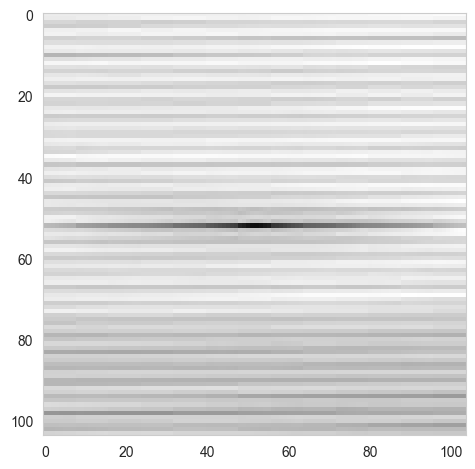

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_01.jpg : [4.159344]


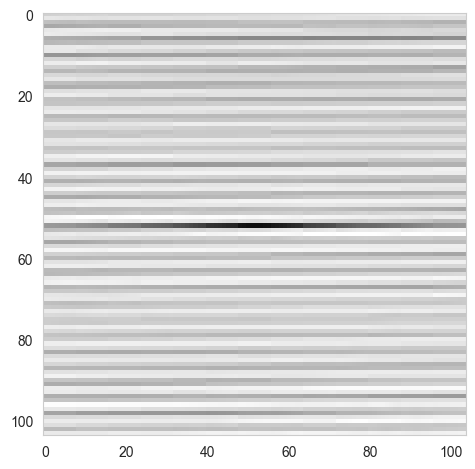

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_09.jpg : [7.461302]


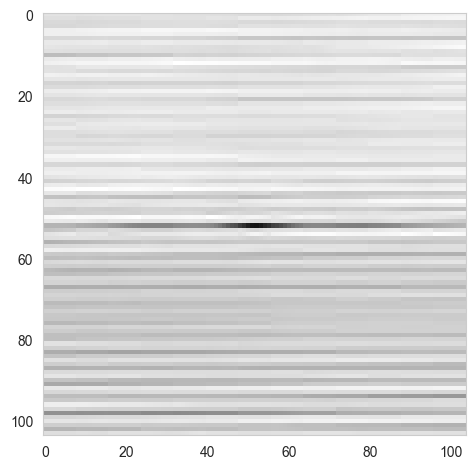

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_10.jpg : [7.1298847]


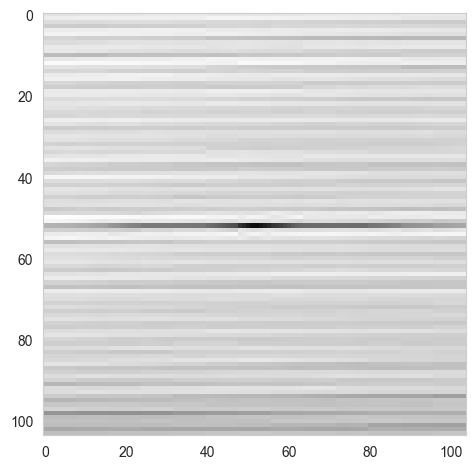

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_20.jpg : [6.4186697]


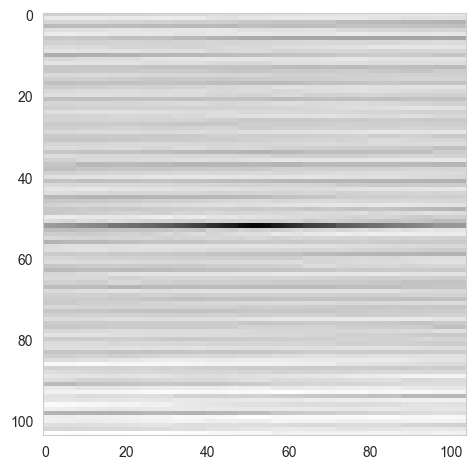

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_10.jpg : [9.730662]


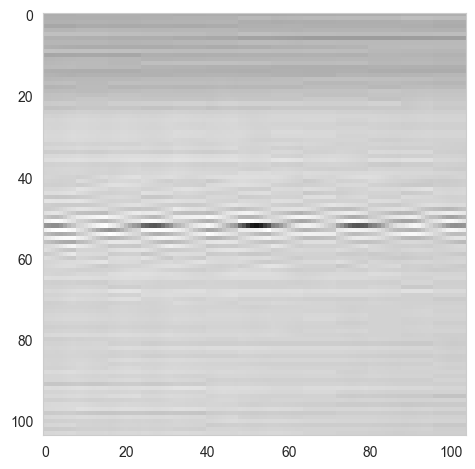

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_25.jpg : [8.71405]


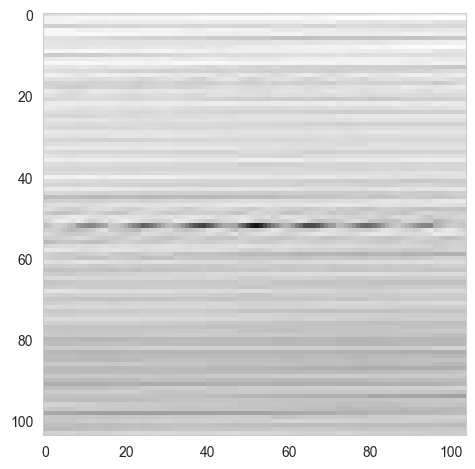

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_51.jpg : [8.495981]


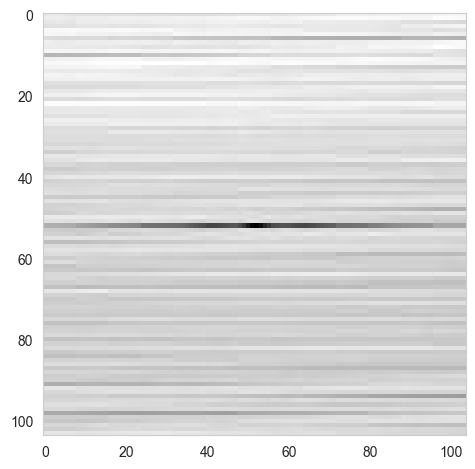

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_57.jpg : [7.1284976]


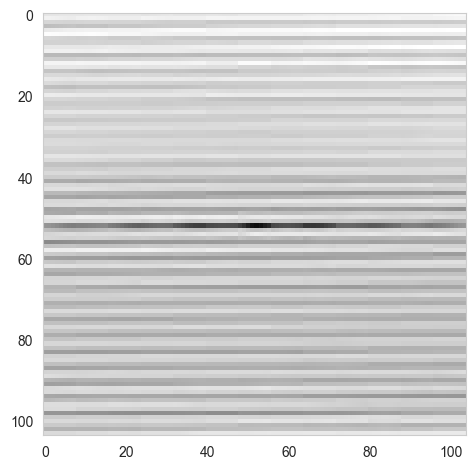

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_19.jpg : [8.597868]


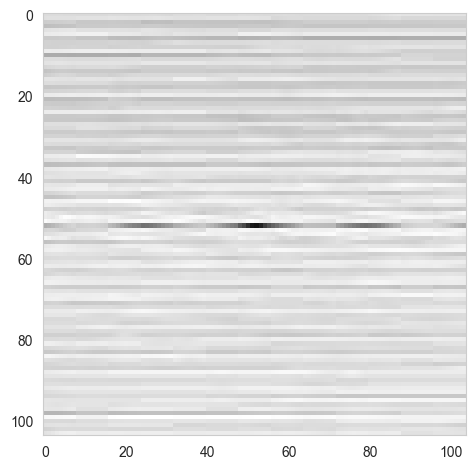

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_28.jpg : [8.479689]


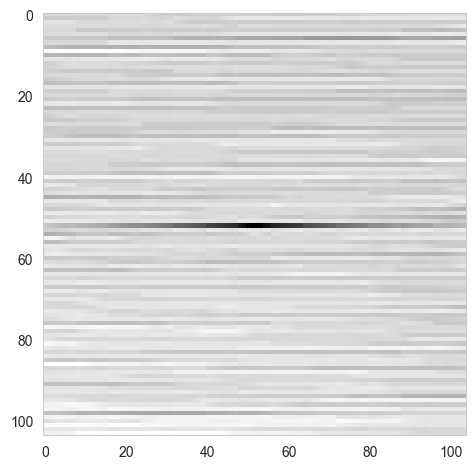

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_41.jpg : [9.201271]


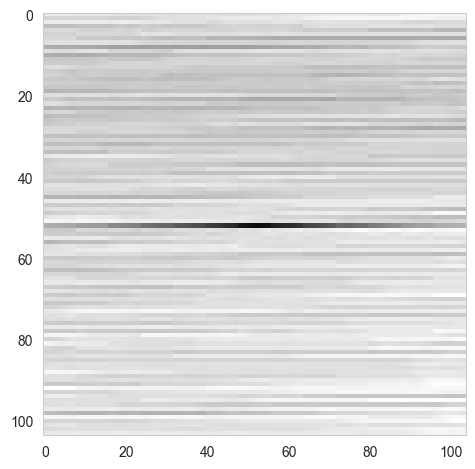

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_50.jpg : [8.140997]


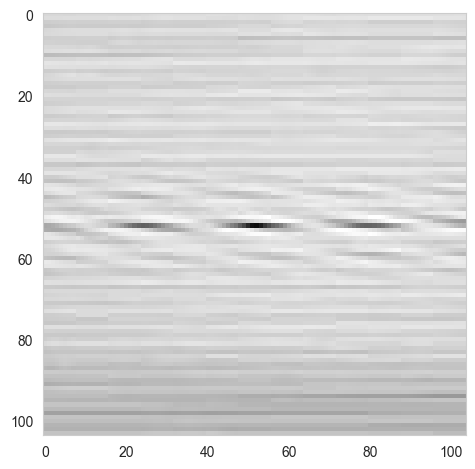

FA0004_GW01_H01_0202_20211109113648_farm_mic_snd_5c7055cd4535_51.jpg : [9.484429]


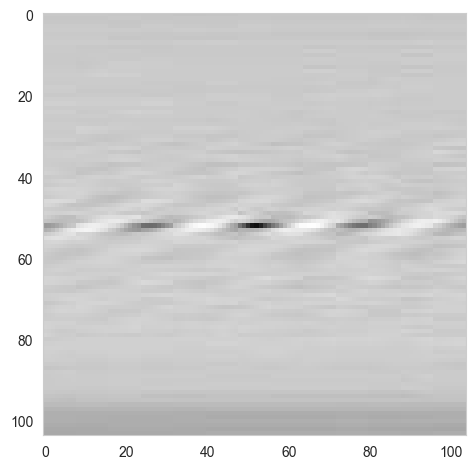

FA0004_GW01_H01_0202_20211109121148_farm_mic_snd_205bc5a648e9_29.jpg : [8.562872]


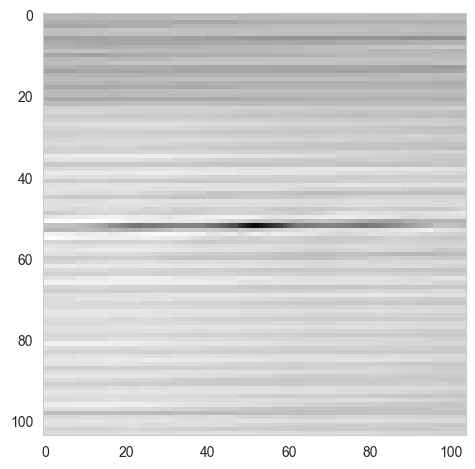

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_30.jpg : [9.999348]


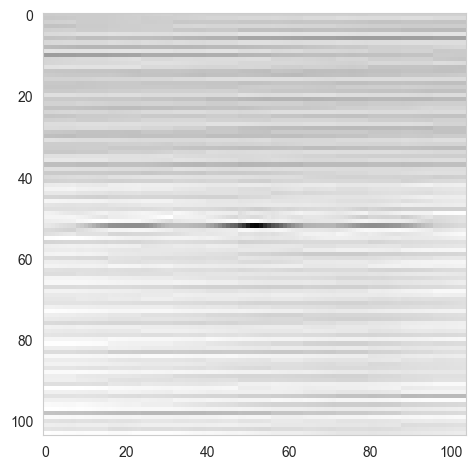

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_31.jpg : [9.691819]


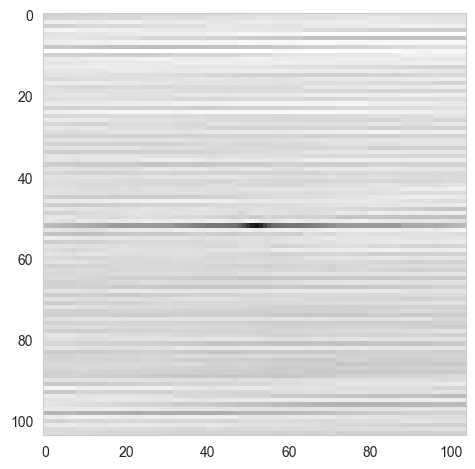

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_39.jpg : [8.975357]


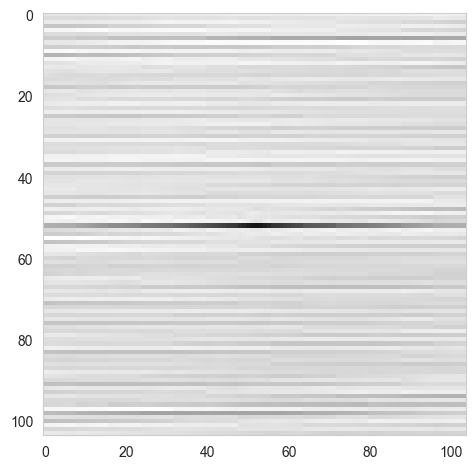

FA0004_GW01_H01_0202_20211109141145_farm_mic_snd_ccd03cf14804_48.jpg : [6.2270246]


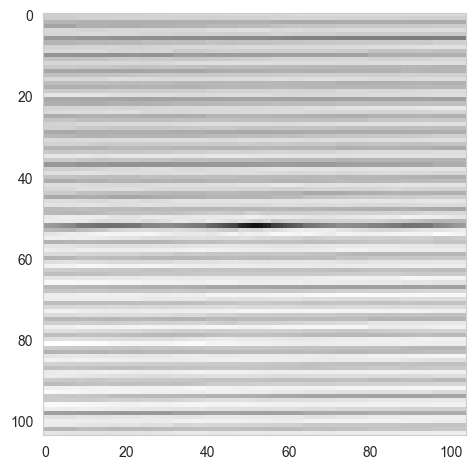

FA0004_GW01_H01_0202_20211109143144_farm_mic_snd_d7dc95c843db_51.jpg : [7.7805643]


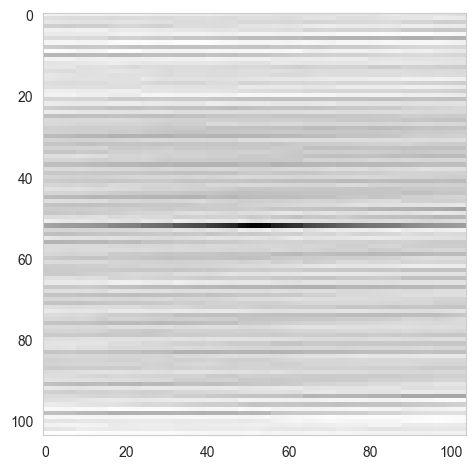

FA0004_GW01_H01_0202_20211109145646_farm_mic_snd_96c753214df8_53.jpg : [4.410203]


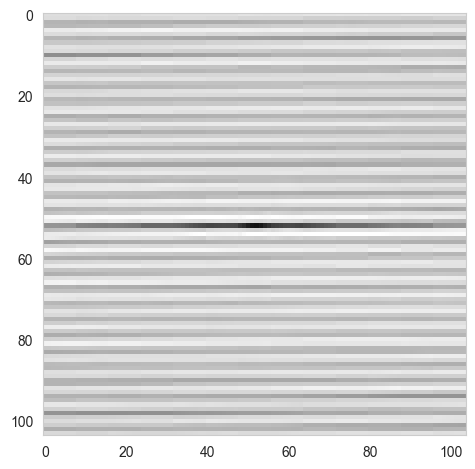

FA0004_GW01_H01_0202_20211109151647_farm_mic_snd_fe5713a7443c_58.jpg : [6.9009037]


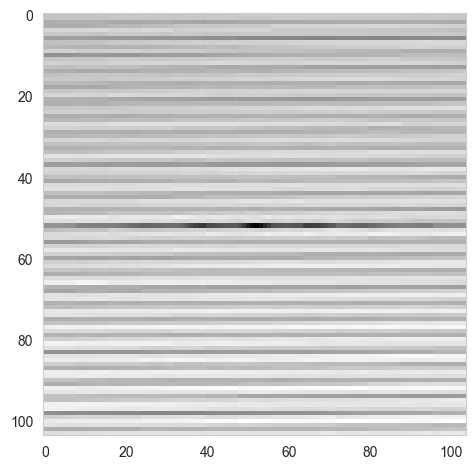

FA0004_GW01_H01_0202_20211109171645_farm_mic_snd_c1b7e5ec412b_25.jpg : [9.2506895]


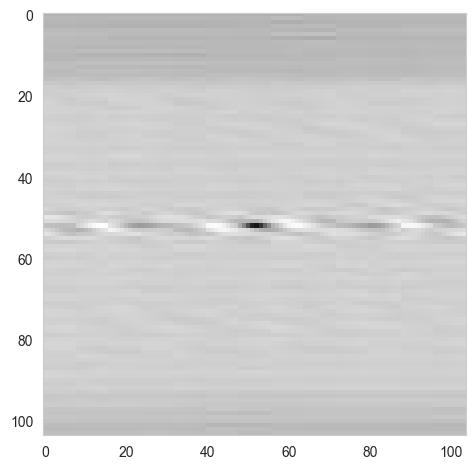

FA0004_GW01_H01_0202_20211109174646_farm_mic_snd_b7b2ac384aa9_10.jpg : [9.823266]


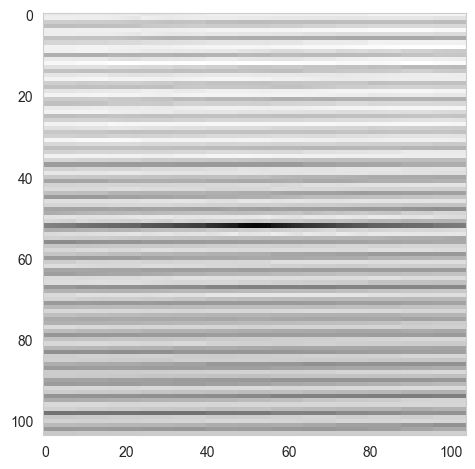

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_28.jpg : [5.838175]


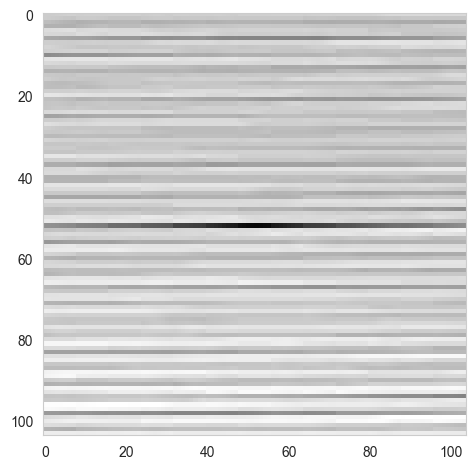

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_35.jpg : [9.608823]


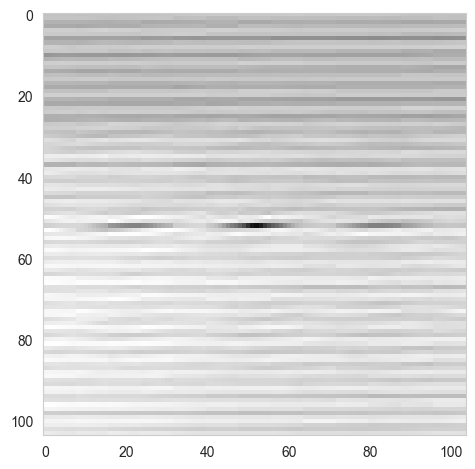

FA0004_GW01_H01_0202_20211109180146_farm_mic_snd_aac2e24e4362_50.jpg : [5.2804117]


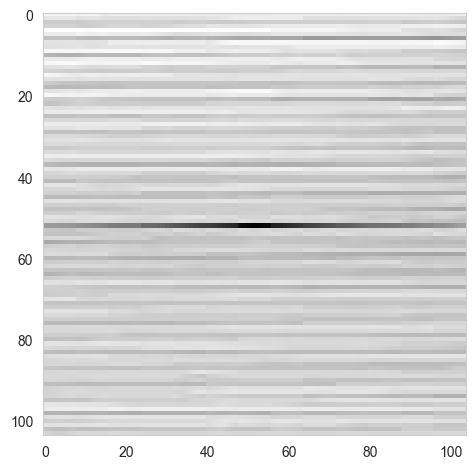

FA0004_GW01_H01_0202_20211109204145_farm_mic_snd_8e82c14b4e7a_25.jpg : [7.941652]


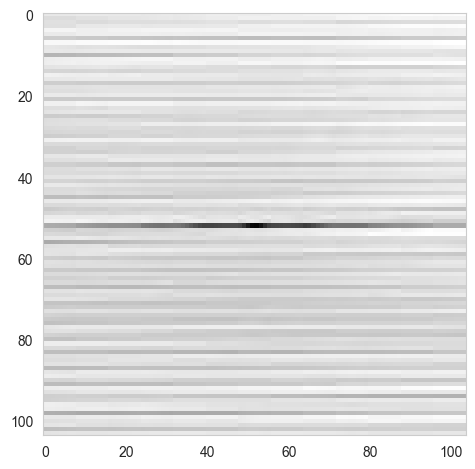

FA0004_GW01_H01_0202_20211109204145_farm_mic_snd_8e82c14b4e7a_26.jpg : [7.0447335]


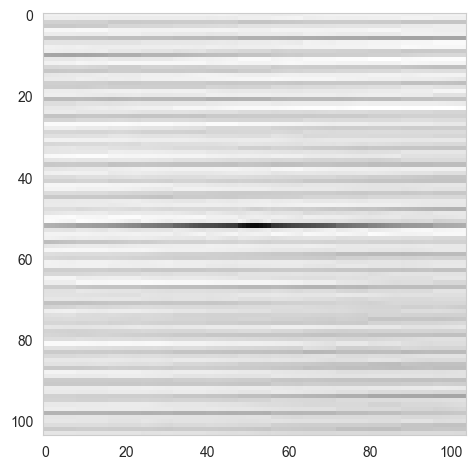

FA0004_GW01_H01_0202_20211109211157_farm_mic_snd_532a48864ac9_13.jpg : [8.192836]


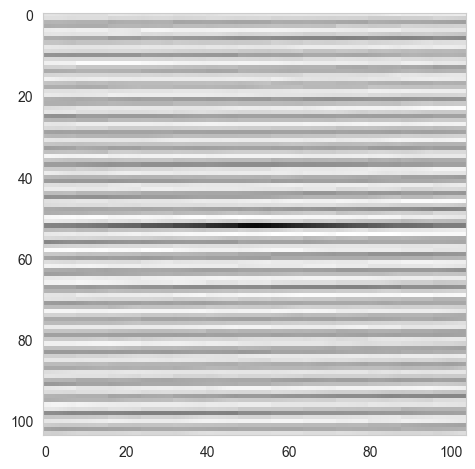

FA0004_GW01_H01_0202_20211109211157_farm_mic_snd_532a48864ac9_32.jpg : [9.718103]


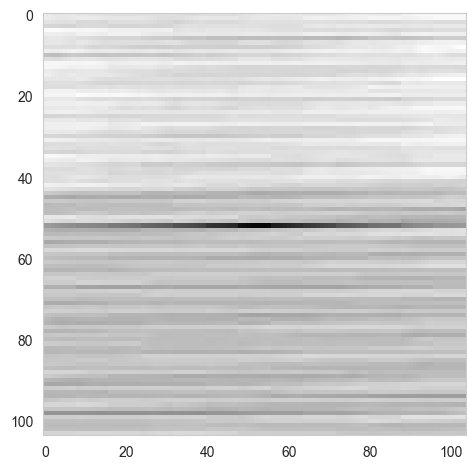

In [57]:
# abnormal
fileListabnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 30.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
fileListabnormal = rawDf[(rawDf.recon_error < 10.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
len(fileListabnormal)
for idx, aName in enumerate(fileListabnormal) : 
    if idx > 50 : break
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()